In [1]:
from data_utils import ImaginationPerceptionData
import config
import mne
import numpy as np

['Fpz', 'PPO2', 'FT9', 'Cz', 'C3', 'FC4', 'PO9', 'Fz', 'TP8', 'T7', 'F3', 'CP3', 'O2', 'PO7', 'FT7', 'Fp1', 'AFz', 'F7', 'TP7', 'FCz', 'PO3', 'AF4', 'T8', 'FC3', 'P4', 'PO4', 'TTP8h', 'P8', 'TTP7h', 'PO8', 'Pz', 'P7', 'POz', 'F4', 'C4', 'AF7', 'PO10', 'CP4', 'FT10', 'AF8', 'F8', 'PPO1', 'P3', 'O1', 'AF3', 'FT8', 'Fp2']


In [2]:
bidsPath = 'F:\perceptionImaginationEEG\perceptionImaginationEEG\DataSet\derivatives\preprocessed'
data = ImaginationPerceptionData(bidsPath=bidsPath)

In [3]:
dataLoaded = mne.io.read_raw_fif(data.fileEventsDetails.filePath, preload=True)

Opening raw data file F:\perceptionImaginationEEG\perceptionImaginationEEG\DataSet\derivatives\preprocessed\sub-010\ses-01\eeg\sub10_sess1_50_ica_eeg.fif...
    Range : 0 ... 4326399 =      0.000 ...  4224.999 secs
Ready.
Opening raw data file F:\perceptionImaginationEEG\perceptionImaginationEEG\DataSet\derivatives\preprocessed\sub-010\ses-01\eeg\sub10_sess1_50_ica_eeg-1.fif...
    Range : 4326400 ... 4958827 =   4225.000 ...  4842.604 secs
Ready.
Reading 0 ... 4958827  =      0.000 ...  4842.604 secs...


In [4]:
imaginationData = dataLoaded.copy().pick(config.imaginationChannels)
perceptionData = dataLoaded.copy().pick(config.perceptionChannels)
imaginationData = imaginationData.get_data()
perceptionData = perceptionData.get_data()

In [22]:
imaginationDataTrials = []
for event in data.fileEventsDetails.imaginationEvents:
    startIndex = event[2]
    endIndex = event[3]
    temp = imaginationData[:, startIndex:endIndex]
    imaginationDataTrials.append(temp)

perceptionDataTrials = []
for event in data.fileEventsDetails.perceptionEvents:
    startIndex = event[2]
    endIndex = event[3]
    temp = perceptionData[:, startIndex:endIndex]
    perceptionDataTrials.append(temp)

In [25]:
for item in perceptionDataTrials:
    print(len(item[0]))

3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
3072
3072
3072
3072
3072
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096


In [23]:
imaginationDataTrials = np.array(imaginationDataTrials)
perceptionDataTrials = np.array(perceptionDataTrials)
perceptionDataTrials.shape, imaginationDataTrials.shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (450, 14) + inhomogeneous part.

In [9]:
baselineImagination = imaginationDataTrials[:,:, 0:1024]
baselinePerception = imaginationDataTrials[:,:, 0:1024]

((450, 39, 1024), (450, 39, 4096))

In [10]:
baselineMean = np.mean(baseline, axis=2, keepdims=True)
responseCorrected = response-baselineMean
xCorrected = x-baselineMean

In [11]:
xCorrectedSegemented = xCorrected.reshape(xCorrected.shape[0], xCorrected.shape[1], 64, -1)
xCorrectedSegemented = xCorrectedSegemented.mean(axis=2)
xCorrectedSegemented.shape

(450, 39, 80)

In [12]:
erp = np.mean(xCorrectedSegemented, axis=0)

In [13]:
erp.shape

(39, 80)

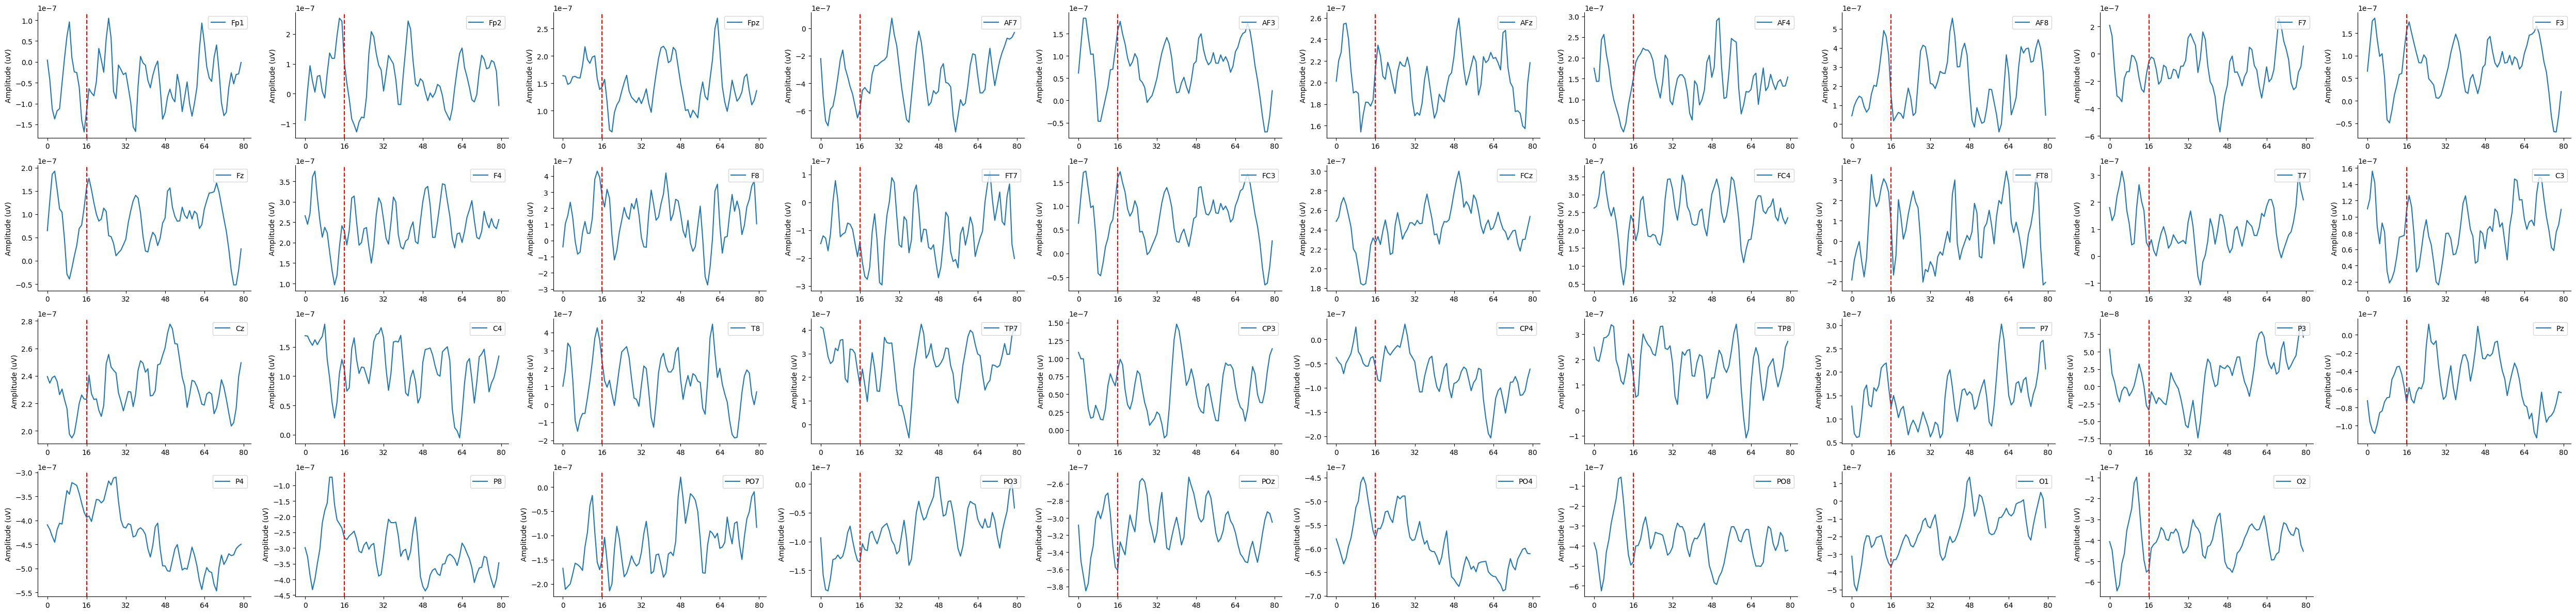

In [17]:
import mne
import matplotlib.pyplot as plt
import numpy as np

n_channels = 39
n_samples = 80
plots_per_row = 10
n_rows = int(np.ceil(n_channels / plots_per_row))

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(50, 3 * n_rows))
axes = axes.flatten()

for i in range(n_channels):
    ax = axes[i]
    ax.plot(erp[i])
    ax.legend([config.imaginationChannels[i]], loc='upper right')  
    ax.axvline(x=16, color='r', linestyle='--', label='Stimulus Finish')
    ax.set_xticks(np.arange(0, n_samples + 1, 16))
    ax.set_ylabel('Amplitude (uV)')
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    ax.set_xlabel('')  

for j in range(n_channels, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('sub_10_imaginary.png', dpi=300)
